In [1]:
import sys
sys.path.append('../code/')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from torch import nn
import matplotlib.pyplot as plt
from sklearn.model_selection import ShuffleSplit
import os
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from nilearn import datasets, plotting

from mamba_ssm import Mamba

import utils
from train_ann_sweep import get_generators
import pickle
from train_ann_sweep import get_generators

device = torch.device("cuda:0")
# device = torch.device("cpu")

In [3]:
atlas = datasets.fetch_atlas_msdl()
# Loading atlas image stored in 'maps'
atlas_filename = atlas["maps"]
# Loading atlas data stored in 'labels'
labels = atlas["labels"]

df = pd.read_pickle('../data/developmental_df.pkl')
n_subjects = len(np.unique(df['subj'].values))

time_series = df.iloc[:,:-1].values

pca = PCA(n_components=39)
points = pca.fit_transform(time_series)


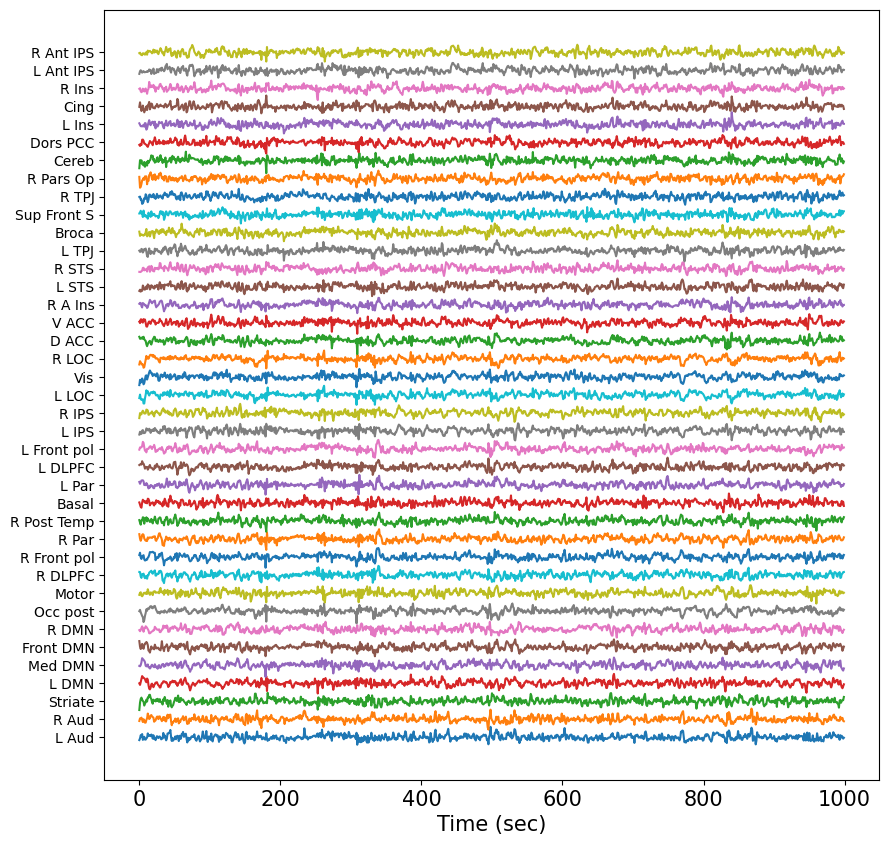

In [22]:
labelsize = 15
ticksize = 15

num_timepoints, num_regions = time_series.shape
assert num_regions == len(labels)

plt.figure(figsize=(10,10))

offset = 0
ytick_list = list()
for region_idx in range(num_regions):
    plot_data = time_series[:1000, region_idx]
    plt.plot((plot_data + offset) - np.mean(plot_data))
    ytick_list.append(offset)
    offset += 7


plt.yticks(ytick_list, labels=labels)
plt.xticks(fontsize=ticksize)
plt.xlabel('Time (sec)', fontsize=labelsize)
plt.savefig('../figures/raw_fmri_plot.png')